In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
mp.style.use('classic')

# in kV
tlp = [1.5, 1.6, 1.6, 1.6, 6.2, 5.0, 11.5, 8.3, 18.7, 13.2]
hmm = [2.0, 2.0, 2.5, 2.4, 6.5, 5.0, 13.0, 9.5, 20.0, 14.5]
ticks=['A', 'B', 'C', 'D', 'E', 'F', 'G' , 'H', 'I' , 'J' ] 
ind = np.arange(len(ticks))

In [2]:
# in V
tlp_hmm = [640, 700, 890, 860, 0,0,0,0,0,0]
# in ohms
rons =    [6.2, 2.85, 9.7, 13.3, 2.7, 3.25, 2.4, 4.7, 1.7, 1.85]
r_tlp_hmm = 90
r_hmm = 300
#
tlp_hmm_ifail = [v / (r_tlp_hmm + ron) for v,ron in zip(tlp_hmm, rons)]

tlp_hmm_normalized = [i * (r_hmm + ron) / 1000 for i,ron in zip(tlp_hmm_ifail,rons)]
#tlp_hmm_normalized = [i if i > 0 else np.NaN for i in tlp_hmm_normalized ]
tlp_hmm_normalized

[2.037089397089397,
 2.283198707592892,
 2.764623871614844,
 2.608305905130688,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

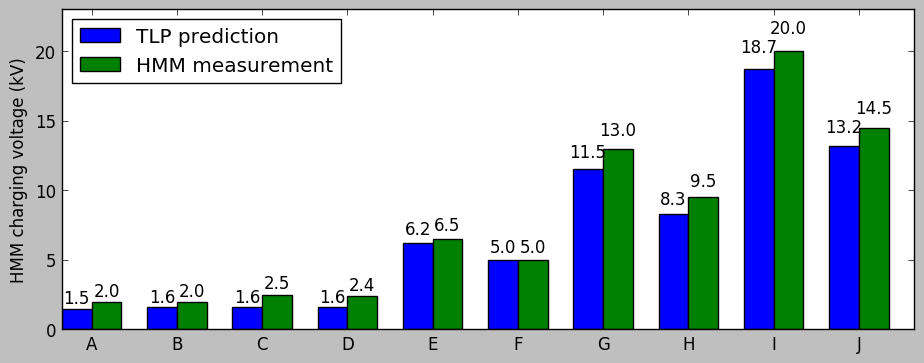

In [3]:
width = 0.35

f, ax = plt.subplots(1,1,figsize=(11,4))
rects1 = ax.bar(ind,         tlp, width, color='b')
rects2 = ax.bar(ind + width, hmm, width, color='g')
plt.xticks(ind + width, ticks)
ax.legend((rects1[0], rects2[0]), ('TLP prediction', 'HMM measurement'), loc="upper left")
ax.set_ylim([0, 23])
ax.set_ylabel('HMM charging voltage (kV)')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.1f' % height,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.savefig("../../src/5/figures/correlation_results.png", pad_inches=0.3)
plt.show()

## Same but in french

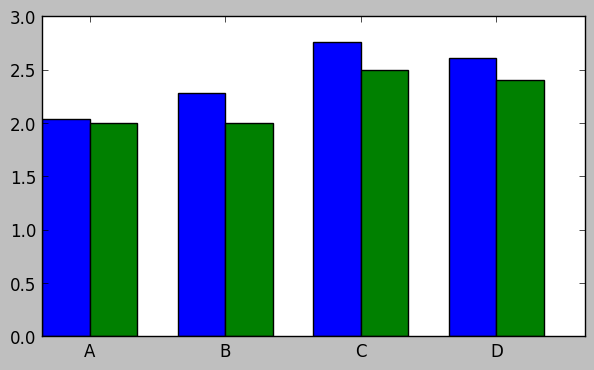

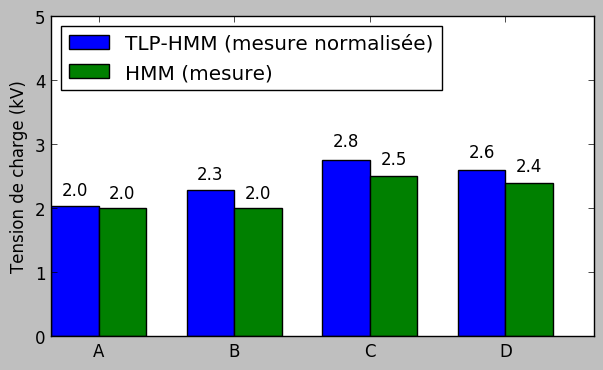

In [14]:
width = 0.35

f, ax = plt.subplots(1,1,figsize=(7,4))
rects1 = ax.bar(ind[0:4],         tlp_hmm_normalized[0:4], width, color='b')
rects2 = ax.bar(ind[0:4] + width, hmm[0:4], width, color='g')
plt.xticks(ind[0:4] + width, ticks[0:4])
ax.legend((rects1[0], rects2[0]), ('TLP-HMM (mesure normalisée)', 'HMM (mesure)'), loc="upper left")
ax.set_ylim([0, 5])
ax.set_ylabel('Tension de charge (kV)')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.1f' % height,
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.savefig("./correlation_results.png", pad_inches=0.3)
plt.show()